In [365]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [366]:
df = pd.read_csv("/home/joswin_dsouza/Cleveland_Heart_Disease/heart_disease_uci.csv")

df.sample(10)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
547,548,54,Male,Hungary,asymptomatic,140.0,NaN,False,normal,118.0,True,0.0,NaN,NaN,NaN,1
761,762,40,Male,VA Long Beach,asymptomatic,125.0,0.0,True,normal,165.0,False,0.0,NaN,NaN,reversable defect,1
729,730,60,Male,VA Long Beach,atypical angina,160.0,267.0,True,st-t abnormality,157.0,False,0.5,flat,NaN,NaN,1
399,400,48,Female,Hungary,asymptomatic,150.0,227.0,False,normal,130.0,True,1.0,flat,NaN,NaN,0
909,910,68,Male,VA Long Beach,non-anginal,134.0,254.0,True,normal,151.0,True,0.0,NaN,NaN,normal,0
253,254,51,Female,Cleveland,non-anginal,120.0,295.0,False,lv hypertrophy,157.0,False,0.6,upsloping,0.0,normal,0
398,399,48,Female,Hungary,asymptomatic,120.0,254.0,False,st-t abnormality,110.0,False,0.0,NaN,NaN,NaN,0
758,759,58,Male,VA Long Beach,asymptomatic,NaN,203.0,True,normal,NaN,NaN,NaN,NaN,NaN,NaN,1
468,469,55,Male,Hungary,asymptomatic,140.0,229.0,False,normal,110.0,True,0.5,flat,NaN,NaN,0
730,731,56,Male,VA Long Beach,atypical angina,126.0,166.0,False,st-t abnormality,140.0,False,0.0,NaN,NaN,NaN,0


In [367]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,920.0,460.500000,265.725422,1.0,230.75,460.5,690.25,920.0
age,920.0,53.510870,9.424685,28.0,47.00,54.0,60.00,77.0
trestbps,861.0,132.132404,19.066070,0.0,120.00,130.0,140.00,200.0
chol,890.0,199.130337,110.780810,0.0,175.00,223.0,268.00,603.0
thalch,865.0,137.545665,25.926276,60.0,120.00,140.0,157.00,202.0
oldpeak,858.0,0.878788,1.091226,-2.6,0.00,0.5,1.50,6.2
ca,309.0,0.676375,0.935653,0.0,0.00,0.0,1.00,3.0
num,920.0,0.995652,1.142693,0.0,0.00,1.0,2.00,4.0


In [368]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [369]:
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [370]:
df.nunique()

id          920
age          50
sex           2
dataset       4
cp            4
trestbps     61
chol        217
fbs           2
restecg       3
thalch      119
exang         2
oldpeak      53
slope         3
ca            4
thal          3
num           5
dtype: int64

In [371]:
x_train_df = df.drop(columns=['id','dataset'])
x_train_df.sample(5)


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
361,42,Male,asymptomatic,140.0,358.0,False,normal,170.0,False,0.0,NaN,NaN,NaN,0
196,69,Male,typical angina,160.0,234.0,True,lv hypertrophy,131.0,False,0.1,flat,1.0,normal,0
350,41,Female,atypical angina,130.0,245.0,False,normal,150.0,False,0.0,NaN,NaN,NaN,0
290,67,Male,non-anginal,152.0,212.0,False,lv hypertrophy,150.0,False,0.8,flat,0.0,reversable defect,1
575,56,Male,asymptomatic,150.0,230.0,False,st-t abnormality,124.0,True,1.5,flat,NaN,NaN,1


In [372]:
categorical_cols = [col for col in x_train_df.columns if x_train_df[col].nunique() < 10]
numeric_cols = [col for col in x_train_df.columns if col not in categorical_cols]


print(numeric_cols)
print(categorical_cols)

['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'num']


In [373]:
x_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   cp        920 non-null    object 
 3   trestbps  861 non-null    float64
 4   chol      890 non-null    float64
 5   fbs       830 non-null    object 
 6   restecg   918 non-null    object 
 7   thalch    865 non-null    float64
 8   exang     865 non-null    object 
 9   oldpeak   858 non-null    float64
 10  slope     611 non-null    object 
 11  ca        309 non-null    float64
 12  thal      434 non-null    object 
 13  num       920 non-null    int64  
dtypes: float64(5), int64(2), object(7)
memory usage: 100.8+ KB


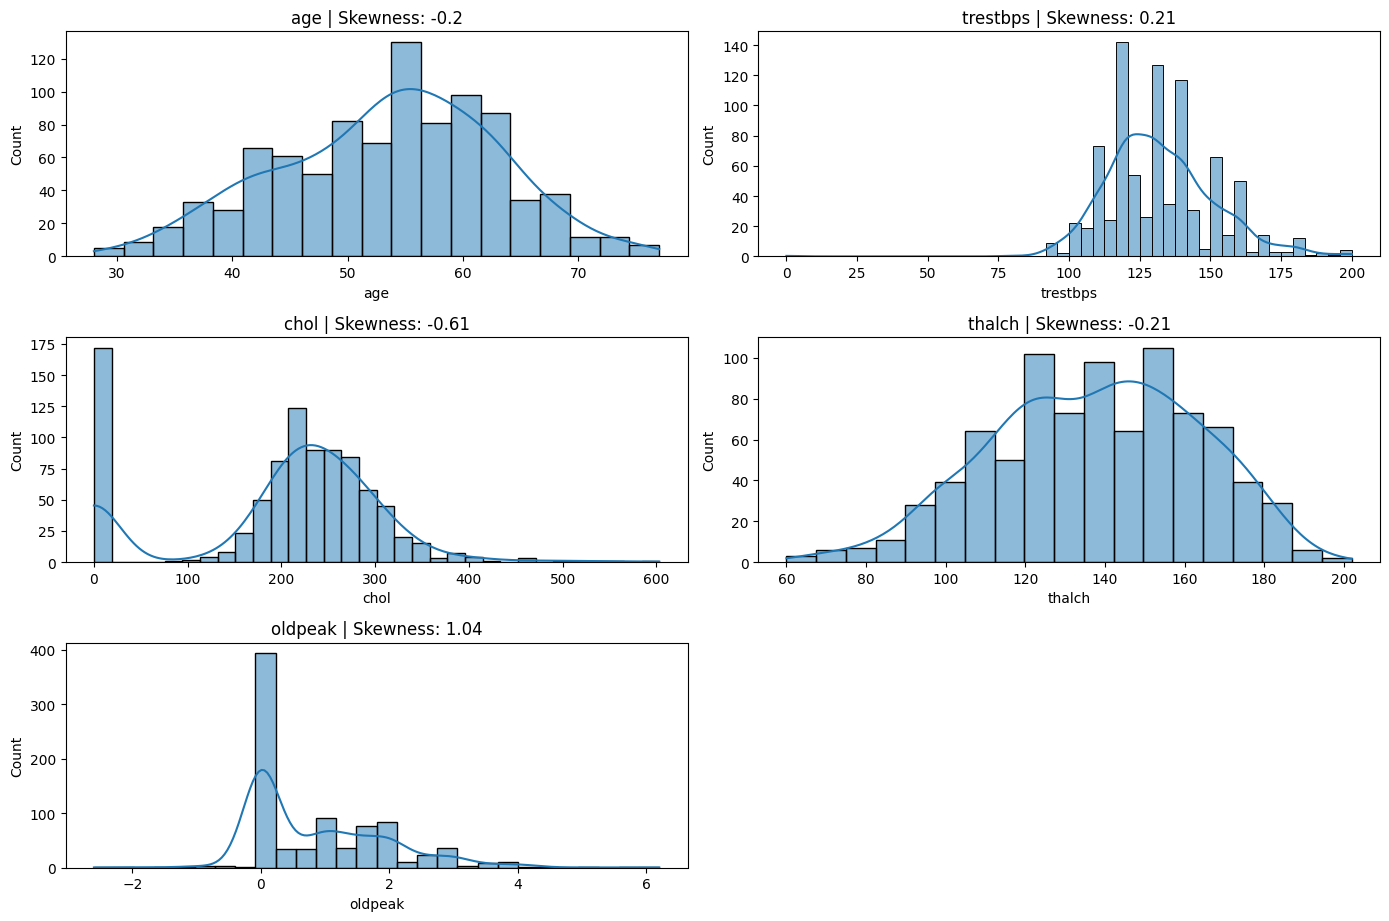

In [374]:
plt.figure(figsize=(14, len(numeric_cols) * 3))
for idx, feature in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 2, idx)
    sns.histplot(x_train_df[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(x_train_df[feature].skew(), 2)}")

plt.tight_layout()
plt.show()

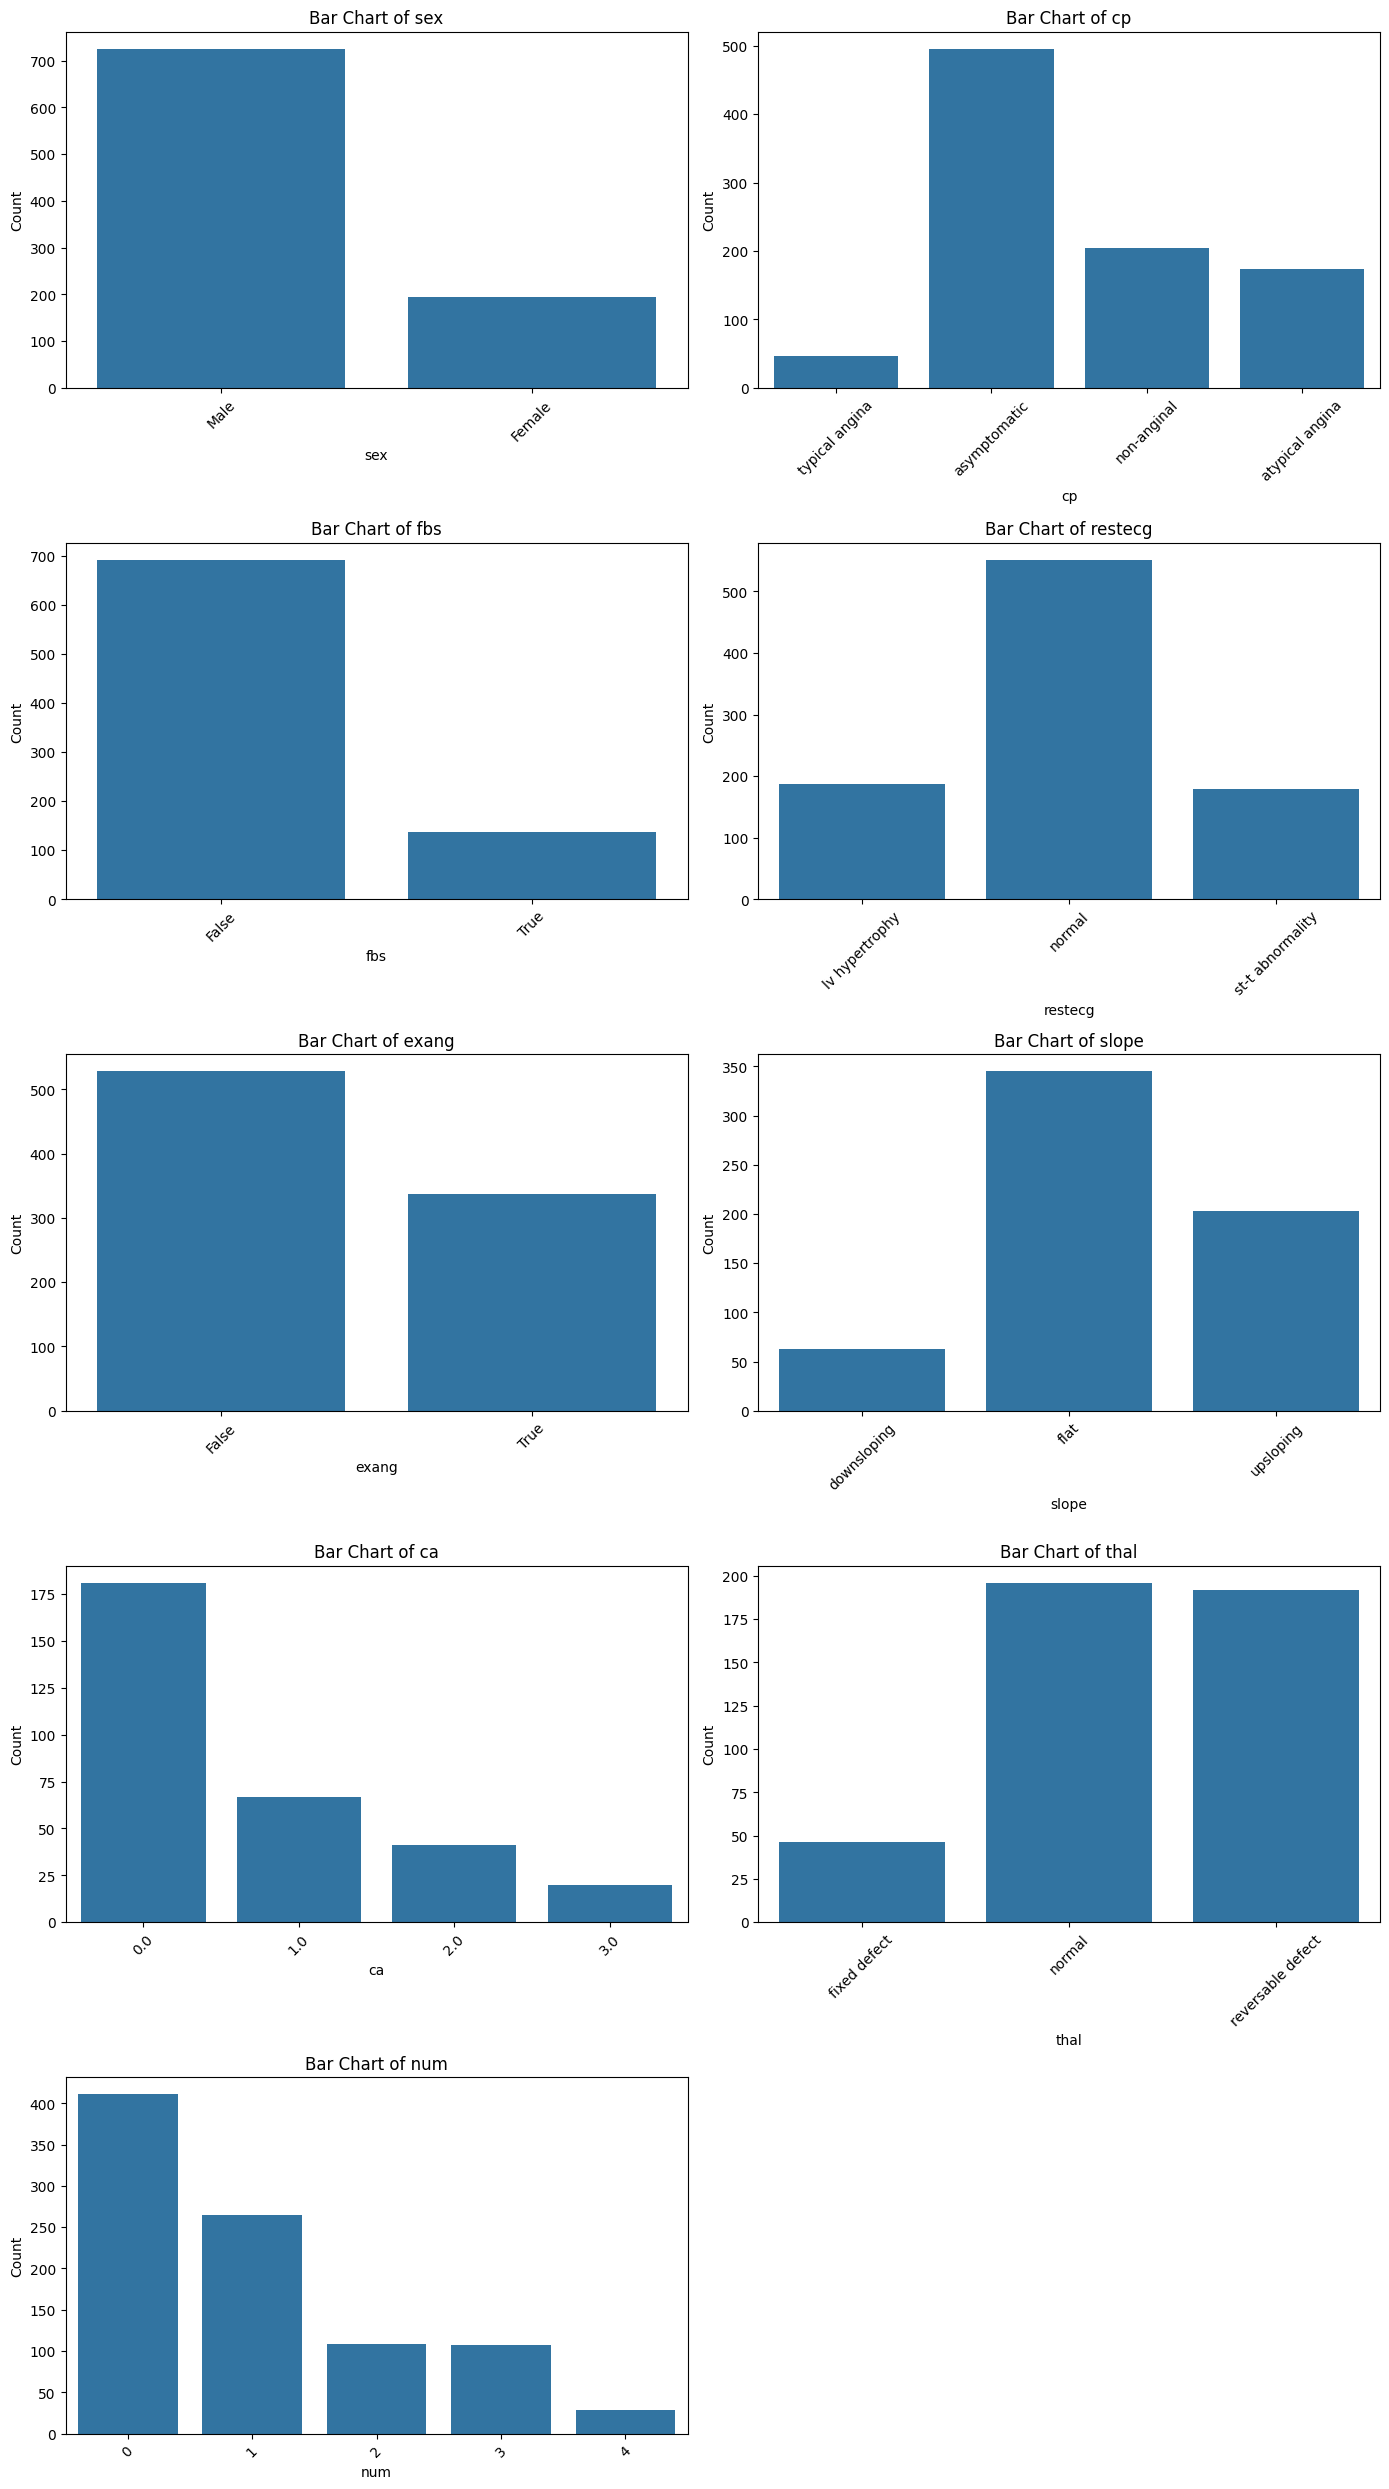

In [375]:
plt.figure(figsize=(14, 5 * len(categorical_cols)))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(len(categorical_cols), 2, i)
    sns.countplot(x=x_train_df[col])
    plt.title(f"Bar Chart of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


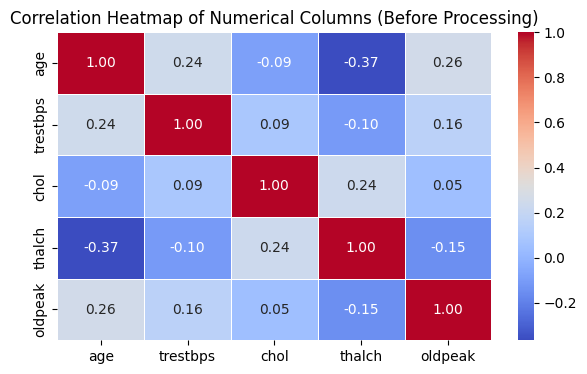

In [376]:
corr = x_train_df[numeric_cols].corr()

# Plot the heatmap
plt.figure(figsize=(7, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap of Numerical Columns (Before Processing)")
plt.show()

In [377]:
pd.set_option('future.no_silent_downcasting', True)
x_train_df = x_train_df.copy()

x_train_df.loc[:, 'fbs'] = x_train_df['fbs'].fillna(x_train_df['fbs'].mode()[0])

x_train_df.loc[:, 'restecg'] = x_train_df['restecg'].fillna(x_train_df['restecg'].mode()[0])

x_train_df.loc[:, 'exang'] = x_train_df['exang'].fillna(x_train_df['exang'].mode()[0])


In [378]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer


# chol with 0.0 which biologically does not make sense will also be imputed.
x_train_df['chol'] = x_train_df['chol'].replace(0.0, np.nan)

scaler = StandardScaler()
scaled = scaler.fit_transform(x_train_df[numeric_cols])

imputer = KNNImputer(n_neighbors= 5, weights="uniform")
imputed_scaled = imputer.fit_transform(scaled)
imputed = scaler.inverse_transform(imputed_scaled)

x_train_df[numeric_cols] = imputed


In [379]:
from sklearn.impute import KNNImputer

x_train_df = x_train_df.copy()

x_train_df.loc[:, 'slope'] = x_train_df['slope'].fillna(x_train_df['slope'].mode()[0])

thal_mapping = {
    "normal": 1,
    "reversable defect": 2,
    "fixed defect": 3
}

x_train_df.loc[:, 'thal'] = x_train_df['thal'].replace(thal_mapping).astype(float)

impute_cols = ['age', 'trestbps', 'chol', 'thalch', 'ca', 'thal', 'num']

ca_thal_imputer = KNNImputer(n_neighbors=5)
ca_thal_imputed = ca_thal_imputer.fit_transform(x_train_df.loc[:, impute_cols])

x_train_df.loc[:, impute_cols] = ca_thal_imputed

x_train_df.loc[:, 'ca'] = x_train_df['ca'].round().astype(int)
x_train_df.loc[:, 'thal'] = x_train_df['thal'].astype(int)


In [380]:
target = x_train_df['num']
x_train_df = x_train_df.drop(columns=['num'])
categorical_cols = [col for col in x_train_df.columns if x_train_df[col].nunique() < 10]
numeric_cols = [col for col in x_train_df.columns if col not in categorical_cols]

print(numeric_cols)
print(categorical_cols)

['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']


In [381]:
# Label Encoding the Remaining Catgeorical Columns
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
label_col =[ 'sex', 'fbs', 'exang', 'ca']

for col in label_col:
    x_train_df[col] = le.fit_transform(x_train_df[col].astype(str))

# Converting unrequired float types into Integers
x_train_df['age'] = x_train_df['age'].round().astype(int)
x_train_df['chol'] =x_train_df['chol'].round().astype(int)
x_train_df['trestbps'] = x_train_df['trestbps'].round().astype(int)

x_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    int64  
 2   cp        920 non-null    object 
 3   trestbps  920 non-null    int64  
 4   chol      920 non-null    int64  
 5   fbs       920 non-null    int64  
 6   restecg   920 non-null    object 
 7   thalch    920 non-null    float64
 8   exang     920 non-null    int64  
 9   oldpeak   920 non-null    float64
 10  slope     920 non-null    object 
 11  ca        920 non-null    int64  
 12  thal      920 non-null    object 
dtypes: float64(2), int64(7), object(4)
memory usage: 93.6+ KB


In [382]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encode_cols = ['cp', 'restecg', 'slope', 'thal']

ohe = OneHotEncoder(
    handle_unknown="ignore",
    sparse_output=False
)

X_train_ohe = ohe.fit_transform(x_train_df[one_hot_encode_cols])

ohe_cols = ohe.get_feature_names_out(one_hot_encode_cols)
X_train_ohe = pd.DataFrame(X_train_ohe,columns=ohe_cols,index=x_train_df.index
)

x_train_df = pd.concat([x_train_df.drop(columns=one_hot_encode_cols), X_train_ohe],axis=1)


In [383]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

x_train_df[numeric_cols] = sc.fit_transform(x_train_df[numeric_cols])


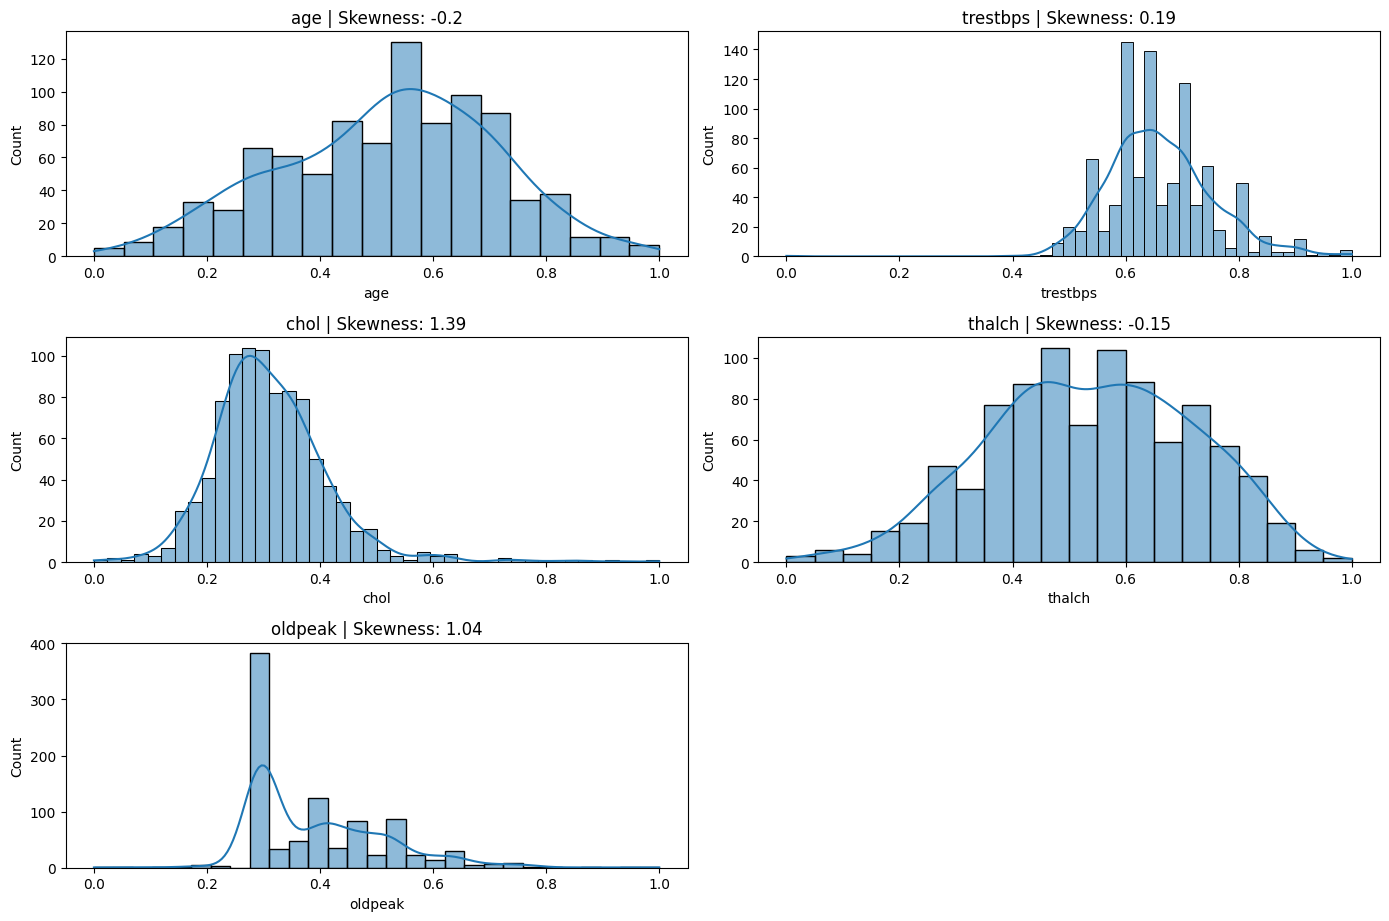

In [384]:
# Post Imputation and data handling
plt.figure(figsize=(14, len(numeric_cols) * 3))
for idx, feature in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 2, idx)
    sns.histplot(x_train_df[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(x_train_df[feature].skew(), 2)}")

plt.tight_layout()
plt.show()

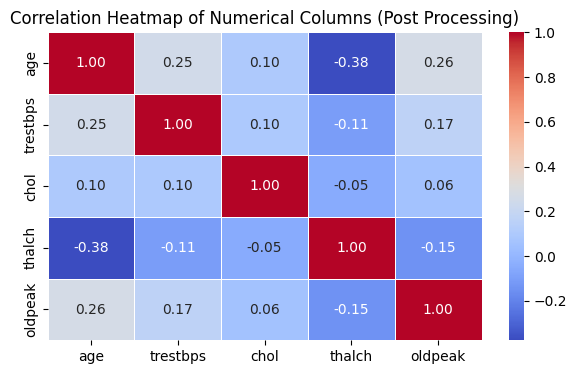

In [390]:
corr = x_train_df[numeric_cols].corr()

# Plot the heatmap
plt.figure(figsize=(7, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap of Numerical Columns (Post Processing)")
plt.show()

In [386]:
# Since I am performing Binary Classfication, I am converting all the multiclasses such as (1-4) 
# to 1 i,e has a heart disease and 0 as 0 i.e No heart disease.
target = target.apply(lambda x : 0 if x == 0 else 1)

In [387]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(x_train_df, target, test_size=0.2, random_state= 42)

In [388]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

clf = LogisticRegression(max_iter=2000)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred))



Accuracy: 0.8206521739130435

Confusion matrix:
 [[62 13]
 [20 89]]

Classification report:
               precision    recall  f1-score   support

           0       0.76      0.83      0.79        75
           1       0.87      0.82      0.84       109

    accuracy                           0.82       184
   macro avg       0.81      0.82      0.82       184
weighted avg       0.83      0.82      0.82       184



In [389]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=500,
    random_state=42,
    n_jobs=-1,
    class_weight="balanced",
    max_features="sqrt"
)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8369565217391305

Confusion matrix:
 [[63 12]
 [18 91]]

Classification report:
               precision    recall  f1-score   support

           0       0.78      0.84      0.81        75
           1       0.88      0.83      0.86       109

    accuracy                           0.84       184
   macro avg       0.83      0.84      0.83       184
weighted avg       0.84      0.84      0.84       184

